In [80]:
###################################
## 2 - Data pre-processing df Complet

import locale
import pandas as pd


fileName = 'df_complet'
pathName = './Data'

# Importer le DataFrame consolide.
df_complet = pd.read_excel(f'{pathName}/{fileName}.xlsx')
print(df_complet.info())
df_complet.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286000 entries, 0 to 285999
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Unnamed: 0          286000 non-null  int64         
 1   Client              285978 non-null  object        
 2   Nombre_avis_publie  286000 non-null  int64         
 3   Note                286000 non-null  int64         
 4   Titres              285955 non-null  object        
 5   Commentaire         232412 non-null  object        
 6   Date_experience     286000 non-null  datetime64[ns]
 7   Date_publication    286000 non-null  datetime64[ns]
 8   Reponse             58498 non-null   object        
 9   Date_reponse        58498 non-null   datetime64[ns]
 10  Pays                286000 non-null  object        
 11  Verifications       286000 non-null  int64         
 12  Entreprise          286000 non-null  object        
dtypes: datetime64[ns](3), int64(4

,Unnamed: 0,Client,Nombre_avis_publie,Note,Titres,Commentaire,Date_experience,Date_publication,Reponse,Date_reponse,Pays,Verifications,Entreprise
0,0,marc lesterpt,1,5,Je commande mes pneus de motos et de voitures,Je commande mes pneus de motos et de voitures ...,2023-07-23,2023-08-05,NaN,NaT,GR,1,Allopneus
1,1,Séverine M,6,5,"Ne cherchez plus vos pneus, Allopneus le peut","BonjourLe site est génial, très bien expliqué ...",2023-07-13,2023-08-04,NaN,NaT,FR,1,Allopneus
2,2,PINTO NUNO,3,5,Tout était parfait,"Tout était parfait, timing parfait dans les da...",2023-07-16,2023-08-04,NaN,NaT,FR,1,Allopneus
3,3,client,4,5,Pneus d'un tres bon rapport qualité…,Pneus d'un tres bon rapport qualité prix. Les ...,2023-07-24,2023-08-05,NaN,NaT,FR,1,Allopneus
4,4,Vignaux,1,4,"Bon suivi de la commande,les questions…","Bon suivi de la commande,les questions sont im...",2023-07-23,2023-08-04,NaN,NaT,FR,1,Allopneus


In [98]:
import numpy as np 
df_complet["Annee"] = df_complet["Date_experience"].dt.year
df_complet["Mois"] = df_complet["Date_experience"].dt.month
df_complet["Saison"]=df_complet["Mois"]
df_complet["Saison"]=df_complet["Saison"].replace([1,2,3,4,5,6,7,8,9], 'Ete')
df_complet["Saison"]=df_complet["Saison"].replace([10,11,12], 'Hiver')
df_complet["Personnalite"]=df_complet["Note"]
df_complet["Personnalite"]=df_complet["Personnalite"].replace([1,2,3], 'Detracteur')
df_complet["Personnalite"]=df_complet["Personnalite"].replace(4, 'Neutre')
df_complet["Personnalite"]=df_complet["Personnalite"].replace(5, 'Promoteur')
longueur=[]
for i, avis in enumerate(df_complet["Commentaire"]) :
    if(type(avis) is float or type(avis) is int):
        longueur.append(0)        
    else :
        longueur.append(len(avis))
df_complet["Longueur"]=longueur
print(df_complet["Saison"].value_counts())
print(df_complet["Saison"].value_counts(normalize=True))
print(df_complet["Personnalite"].value_counts())
print(df_complet["Personnalite"].value_counts(normalize=True))

print(df_complet.info())
df_complet.head()

Ete      199463
Hiver     86537
Name: Saison, dtype: int64
Ete      0.697423
Hiver    0.302577
Name: Saison, dtype: float64
Promoteur     189345
Detracteur     53424
Neutre         43231
Name: Personnalite, dtype: int64
Promoteur     0.662045
Detracteur    0.186797
Neutre        0.151157
Name: Personnalite, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286000 entries, 0 to 285999
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Unnamed: 0          286000 non-null  int64         
 1   Client              285978 non-null  object        
 2   Nombre_avis_publie  286000 non-null  int64         
 3   Note                286000 non-null  int64         
 4   Titres              285955 non-null  object        
 5   Commentaire         232412 non-null  object        
 6   Date_experience     286000 non-null  datetime64[ns]
 7   Date_publication    286000 non-null  datetime64

,Unnamed: 0,Client,Nombre_avis_publie,Note,Titres,Commentaire,Date_experience,Date_publication,Reponse,Date_reponse,Pays,Verifications,Entreprise,Annee,Mois,Saison,Personnalite,Longueur
0,0,marc lesterpt,1,5,Je commande mes pneus de motos et de voitures,Je commande mes pneus de motos et de voitures ...,2023-07-23,2023-08-05,NaN,NaT,GR,1,Allopneus,2023,7,Ete,Promoteur,215
1,1,Séverine M,6,5,"Ne cherchez plus vos pneus, Allopneus le peut","BonjourLe site est génial, très bien expliqué ...",2023-07-13,2023-08-04,NaN,NaT,FR,1,Allopneus,2023,7,Ete,Promoteur,315
2,2,PINTO NUNO,3,5,Tout était parfait,"Tout était parfait, timing parfait dans les da...",2023-07-16,2023-08-04,NaN,NaT,FR,1,Allopneus,2023,7,Ete,Promoteur,227
3,3,client,4,5,Pneus d'un tres bon rapport qualité…,Pneus d'un tres bon rapport qualité prix. Les ...,2023-07-24,2023-08-05,NaN,NaT,FR,1,Allopneus,2023,7,Ete,Promoteur,157
4,4,Vignaux,1,4,"Bon suivi de la commande,les questions…","Bon suivi de la commande,les questions sont im...",2023-07-23,2023-08-04,NaN,NaT,FR,1,Allopneus,2023,7,Ete,Neutre,218


In [67]:
import seaborn as sns
import matplotlib.pyplot as plt



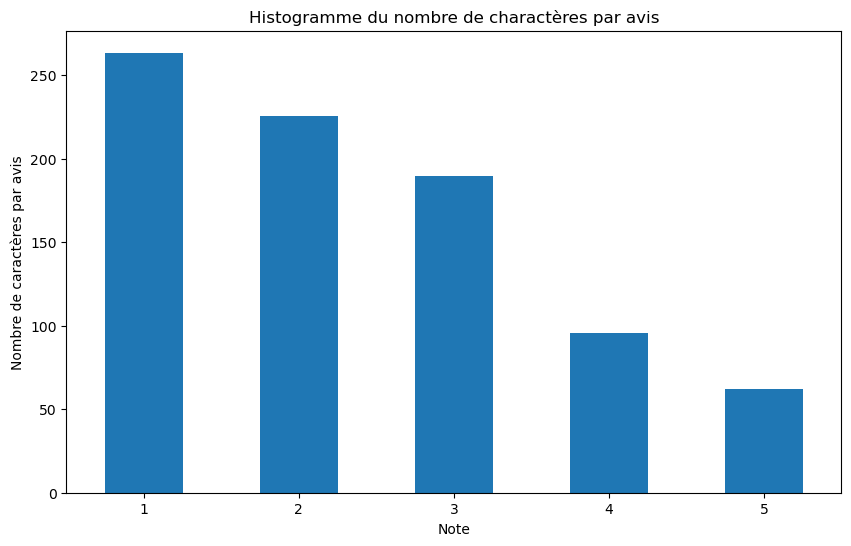

In [78]:
# Histogramme du nombre de charactere par avis.
car_counts = df_complet["Longueur"].groupby(df_complet["Note"]).mean()
car_counts.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.xlabel("Note")
plt.ylabel("Nombre de caractères par avis")
plt.title("Histogramme du nombre de charactères par avis")
plt.xticks(rotation=0)
plt.show()

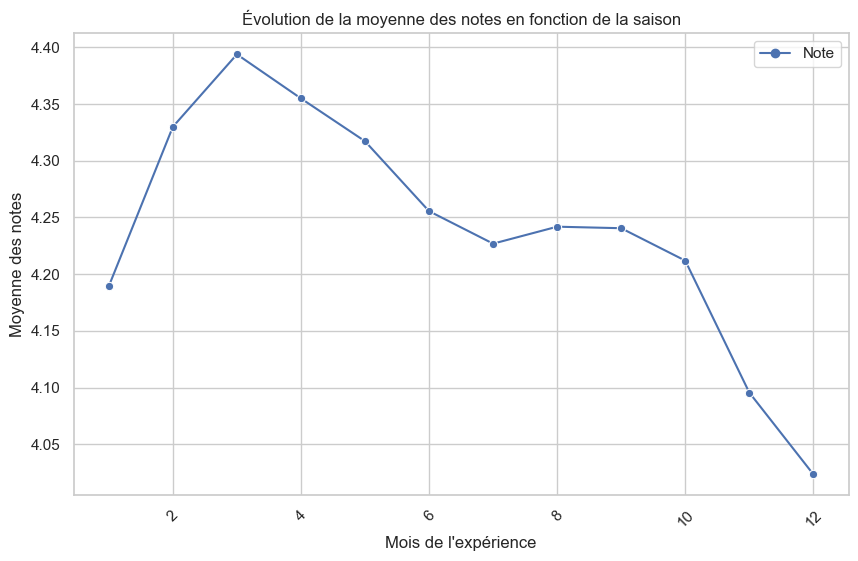

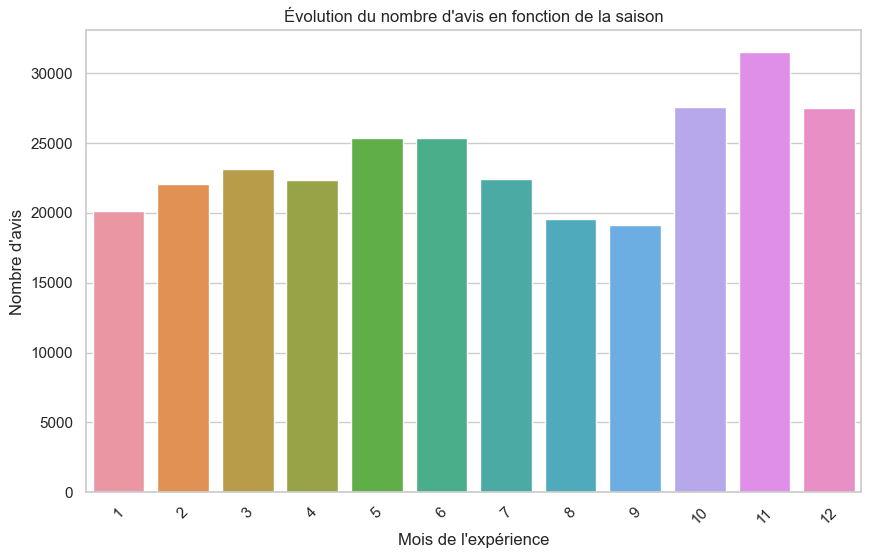

In [96]:
# Impacte des saisons sur le nombres de commande et les Notes attribues.
pivot_table = pd.pivot_table(df_complet,values="Note",index=["Mois"], aggfunc="mean")
#pivot_table = pd.pivot_table(df_complet,values="Note",index=["Mois"], columns="Annee", aggfunc="mean")
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=pivot_table, markers=True)
plt.title("Évolution de la moyenne des notes en fonction de la saison")
plt.xlabel("Mois de l'expérience")
plt.ylabel("Moyenne des notes")
plt.xticks(rotation=45)
plt.show()

# Impacte des saisons sur le nombres de commande et les Notes attribues.
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x='Mois', data=df_complet)
plt.title("Évolution du nombre d'avis en fonction de la saison")
plt.xlabel("Mois de l'expérience")
plt.ylabel("Nombre d'avis")
plt.xticks(rotation=45)
plt.show()

Personnalite  Detracteur    Neutre  Promoteur        Nps
Mois                                                    
1               0.198558  0.149938   0.651504  45.294556
2               0.159150  0.152350   0.688500  52.935044
3               0.142215  0.146364   0.711421  56.920617
4               0.155132  0.146212   0.698655  54.352308
5               0.165162  0.146315   0.688523  52.336080
6               0.179669  0.152994   0.667336  48.766745
7               0.187313  0.146616   0.666071  47.875810
8               0.184084  0.146644   0.669272  48.518746
9               0.180868  0.153947   0.665186  48.431783
10              0.191307  0.153539   0.655154  46.384646
11              0.225784  0.158910   0.615306  38.952251
12              0.246609  0.155617   0.597774  35.116558


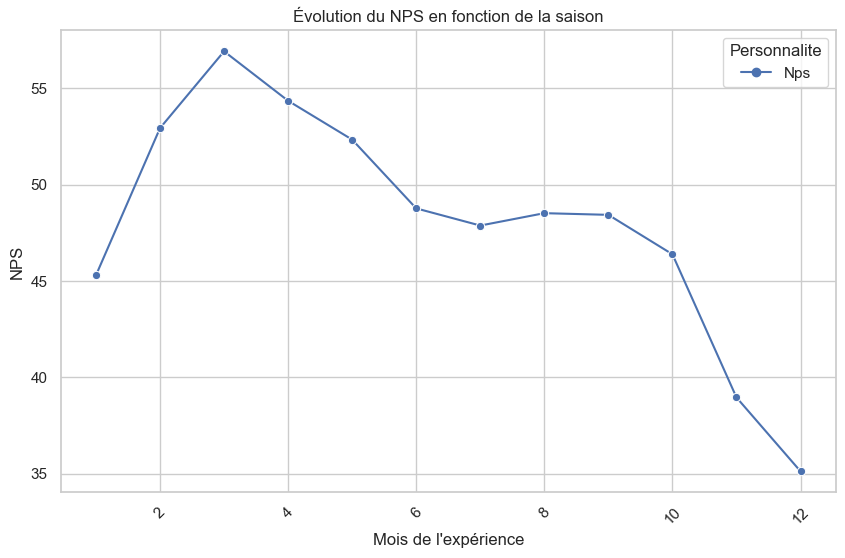

In [115]:
# Definir un score NPS et mesurer son evolution a travers le temps
nps=pd.crosstab(df_complet["Mois"], df_complet["Personnalite"], rownames=['Mois'], colnames=['Personnalite'],normalize=0)
nps["Nps"]=(nps["Promoteur"]-nps["Detracteur"])*100
print(nps)

pivot_table = pd.pivot_table(nps,values="Nps",index=["Mois"])
#pivot_table = pd.pivot_table(df_complet,values="Note",index=["Mois"], columns="Annee", aggfunc="mean")
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=pivot_table, markers=True)
plt.title("Évolution du NPS en fonction de la saison")
plt.xlabel("Mois de l'expérience")
plt.ylabel("NPS")
plt.xticks(rotation=45)
plt.show()